In this blogpost I will be covering one of clustering which sometimes called soft clustering. **Fuzzy clustering** is form of clustering in which each data point can belong to more than one cluster. 

## Clustering

Cluster analysis or **clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). Clustering is not one specific algorithm, but the task of grouping data. This can be achieved by various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them. Out of 100 published clustering algorithms there are common clustering algorithm, 

- Hard Clustering:
    - Connectivity-based clustering (Hierarchical Clustering)
    - Centroid-based Clustering (k-means clustering)
    - Distribution-based Clustering
    - Density-based Clustering
- Soft Clustering:
    - Fuzzy Clustering


In ```sklearn.cluster``` documentation there is nice visual that shows clustering results.

![Scikit-learn Overview of Clustering Algorithms](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


## Fuzzy Clustering

In Fuzzy clustering each element has a set of membership coefficients corresponding to the degree of being in a given cluster. Points close to the center of a cluster, may be in the cluster to a higher degree than points in the edge of a cluster. The degree, to which an element belongs to a given cluster, is a numerical value varying from 0 to 1.

Fuzzy clustering algorithms seeks to minimize cluster memberships and distances, but we will focus on ```Fuzzy C-Means Clustering algorithm```.  Fuzzy c-means developed in 1973 and improved in 1981. It's very similar to k-means algorithm in a structure way:

- Choose number of clusters.
- Assign coefficients randomly to each data point for being in the clusters.
- Repeat until algorithm converged (Objective Function C minimizes cluster memberships and distances):
    - Compute the centroid for each cluster
    - Compute each data points' coefficients of being in the clusters.
    
The main difference with k-means cluster is that objective function for fuzzy c-means algorithm allows different cluster membership with probability values, where k-means cluster has strict objective function allows only one cluster membership. 

---

### Fuzzy C-Means in R

Let's see an implementation in R

```R
library(factoextra) # Custom visualizations for clusters
library(tidyverse)  # Data handling
library(cluster)    # Clustering algorithms

# Reading the data from csv file to R
iris_df <- read_csv('./iris.csv')

# Modify the data, 
#  create unique names for each row by adding species type to row number
#  then add column species to rownames
iris_df <- iris_df %>% 
  group_by(species) %>%
  mutate(spec_idx = row_number()) %>%
  unite('species', species, spec_idx, sep="-", remove=TRUE) %>%
  column_to_rownames('species')
  
# fanny() function from cluster packages is 
#  for fuzzy c-means clustering algorithm
#  we are also defining 3 clusters to create.
res.fanny <- fanny(iris_df,3)

# Look at the membership coefficients of first 7 element
head(res.fanny['membership'], 7)

```


    Output:
                      [,1]       [,2]       [,3]
        setosa-1 0.9115847 0.03714162 0.05127368
        setosa-2 0.8641378 0.05659841 0.07926381
        setosa-3 0.8720433 0.05381542 0.07414133
        setosa-4 0.8459146 0.06419306 0.08989232
        setosa-5 0.9001651 0.04205859 0.05777633
        setosa-6 0.7648869 0.09848692 0.13662620
        setosa-7 0.8601062 0.05878600 0.08110779


Now let's produce the plot using ```factoextra``` package to represent the clusters

```R
# Cluster plot
fviz_cluster(res.fanny, ellipse.type = "convex",
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
            legend = "right")    
```

![Cluster plot]()

Cluster plots are straightforward, provides a visualization of partitioning clustering methods results. We can see from our result setosa is clustering very well but versicolor and virginica species are very close. 

Cluster silhouette plots on the other hand are not very straightforward in first look, however they are very information when we know what is showing. Silhouette plots visualize how the silhouette values are for our cluster. Looking at silhouette values of all clustered objects gives a pretty good idea of the relative quality of the partitioning of your data using a specific clustering algorithm. In our plot that we are going to plot we also have **average silhouette width** which is the average silhouette value of all clustered objects 


```R
# Clusters Silhouette plot
fviz_silhouette(res.fanny, palette = c("#00AFBB", "#E7B800", "#FC4E07"),
                ggtheme = theme_minimal())
```


![Clusters Silhouette plot]()

---

### Fuzzy C-Means in Python

Python implementation of fuzzy c-means is similar to R's implementation. We will be using ```skfuzzy``` library of Python. Oddly enough ```Sklearn``` don't have fuzzy c-means clustering algorithm written inside that's why we are choosing another library. 

To give an example in Python we will create our own data using numpy *(skfuzzy documentation)*. As you will see in Python implementation that it's not as trivial and short, since there isn't a nice and established library for both clustering and visualization. 

In [37]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
## Configure some general styling
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)

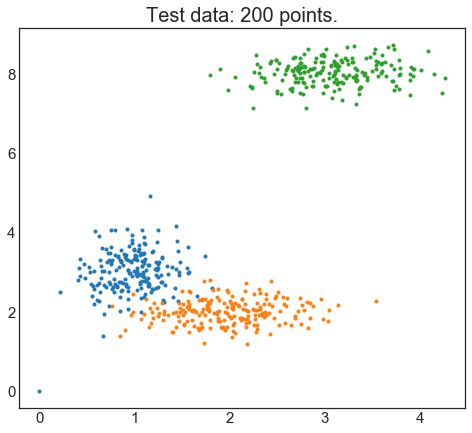

In [62]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[1, 3],
           [2, 2],
           [3, 8]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.3, 0.5],
          [0.5, 0.3],
          [0.5, 0.3]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.')
ax0.set_title('Test data: 200 points.')
plt.show()

Here is we created our test data and plotted them in the figure. With a human eye I can see there there are 3 distinct clusters however we would like to see which number of clusters best produces the clustering model. To be able to achieve that we will loop from 2 to 10 number of clusters *(named centers in this library)* :

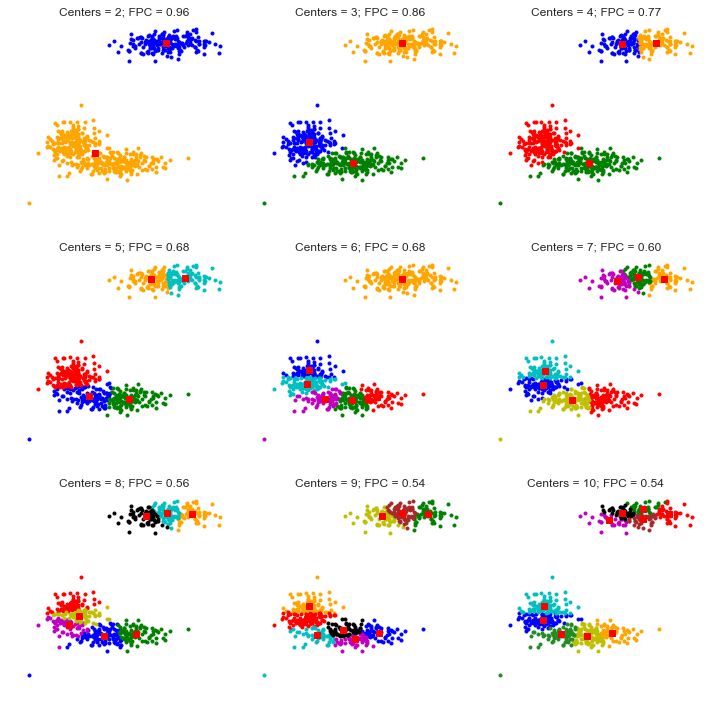

In [63]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

In the plot we see 2 parameters showed along side with the clusters with different number centers. First parameter is called centers which indicates number of clusters. Second parameter **(FPC - Fuzzy Partition Coefficient)** is defined to be in 0-1 range, with 1 being the best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best.

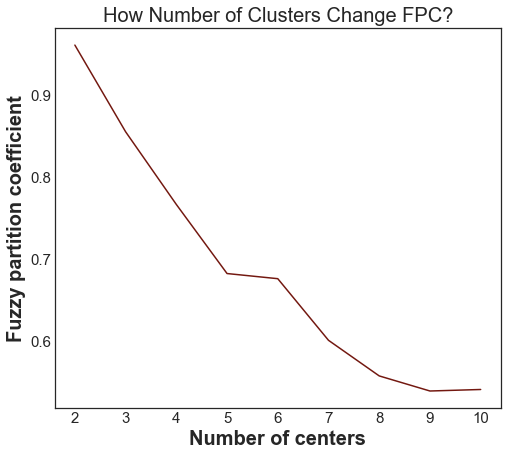

In [68]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

As we can see, the ideal number of centers is 2. This isn’t news for our contrived example, but having the FPC available can be very useful when the structure of your data is unclear.

Note that we started with two centers, not one; clustering a dataset with only one cluster center is the trivial solution and will by definition return FPC == 1.


---

It's also possible to make a predictive model out of this fuzzy clustering model, finding the new observations group, however I won't be covering it in here. You can see it in the [Scikit-Fuzzy Documentation](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html).

### Sources

1. [Practical Guide to Cluster Analysis in R - Chapter 17 - Fuzzy Clustering]()
2. [Data analysis with fuzzy clustering methods](https://www.sciencedirect.com/science/article/pii/S0167947306001307)
3. [A Comparative study Between Fuzzy Clustering Algorithm and Hard Clustering Algorithm](https://arxiv.org/pdf/1404.6059.pdf)
4. [A Tutorial on Clustering Algorithms - Fuzzy CMeans Clustering](https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/cmeans.html)
5. [Statistics HowTo - Fuzzy Clustering](http://www.statisticshowto.com/fuzzy-clustering/)
6. [Scikit-Fuzzy Documentation](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html)